In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Load the dataset
df = pd.read_csv('C:/Users/Asus/.vscode/Amazon Sale Report.csv')

In [2]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [4]:
# Function to parse dates with multiple formats
def parse_date(date):
    for fmt in ("%m-%d-%Y", "%m-%d-%y"):
        try:
            return datetime.strptime(date, fmt)
        except ValueError:
            pass
    return None

# Apply the date parsing function to the Date column
df['Date'] = df['Date'].apply(parse_date)

# Fill missing values in the 'fulfilled-by' column with 'NA'
df['fulfilled-by'].fillna('NA', inplace=True)

# Drop columns with too many missing values
df.drop(columns=[ 'New', 'PendingS'], inplace=True)

# Drop rows with missing values for critical fields (like ship-city, ship-state, ship-postal-code, ship-country)
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)

# Impute missing values for currency and Amount with a placeholder or a calculated value
df['currency'].fillna('Unknown', inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

# Check the remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1865733776.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fulfilled-by'].fillna('NA', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1865733776.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NA
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NA


Mean Amount: 648.5768740249126
Median Amount: 635.0
Standard Deviation of Amount: 272.56121669532195


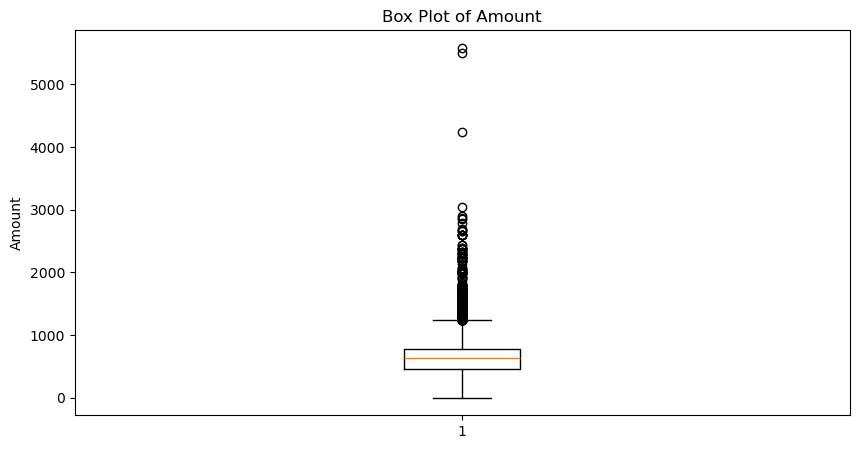

Number of outliers based on Z-score: 947


,Amount,Z-Score
266,2130.00,5.435215
325,1902.86,4.601858
350,1999.00,4.954587
417,1499.00,3.120130
648,2224.00,5.780093
...,...,...
128344,1559.00,3.340265
128403,1556.00,3.329258
128464,1473.00,3.024738
128666,1477.00,3.039414


In [6]:
from scipy import stats

# Step 1: Descriptive Statistics
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()
std_amount = df['Amount'].std()

print(f"Mean Amount: {mean_amount}")
print(f"Median Amount: {median_amount}")
print(f"Standard Deviation of Amount: {std_amount}")

# Step 2: Box Plot
plt.figure(figsize=(10, 5))
plt.boxplot(df['Amount'])
plt.title('Box Plot of Amount')
plt.ylabel('Amount')
plt.show()

# Step 3: Z-score
df['Z-Score'] = stats.zscore(df['Amount'])
outliers_z = df[df['Z-Score'].abs() > 3]

print(f"Number of outliers based on Z-score: {len(outliers_z)}")

# Display outliers
outliers_z[['Amount', 'Z-Score']]

Number of outliers based on Z-score: 947
Number of rows after removing outliers: 127994
Total Sales after removing outliers: 82094997.83364627


C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\2217838159.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M')
C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\2217838159.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


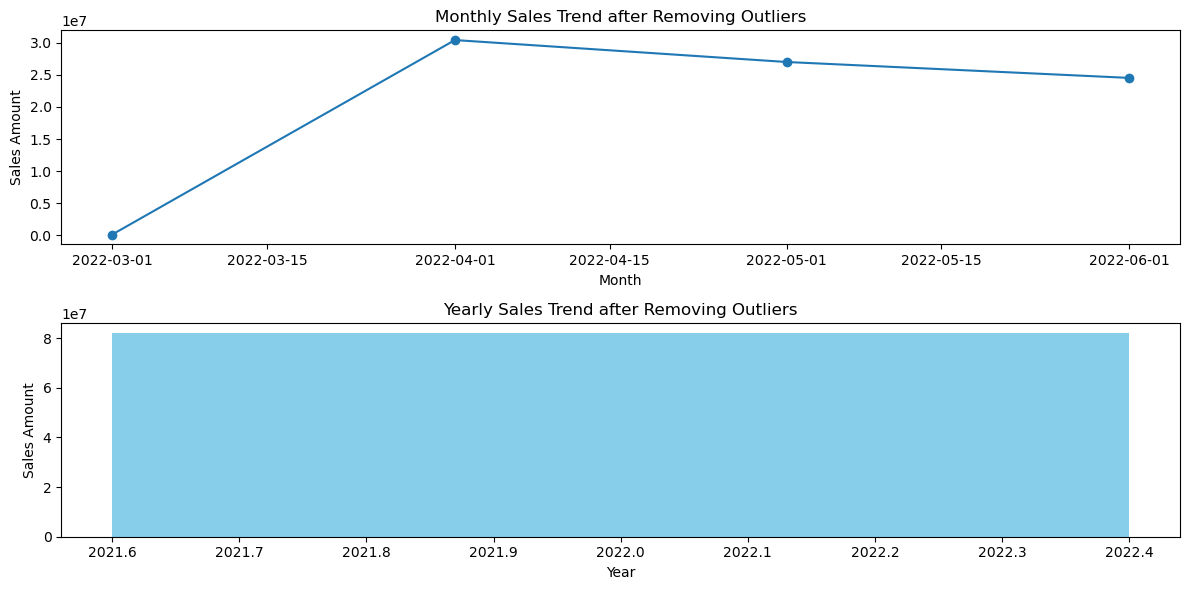

In [7]:
# Calculate Z-score for each data point
df['Z-Score'] = stats.zscore(df['Amount'])

# Identify outliers
outliers = df[df['Z-Score'].abs() > 3]
print(f"Number of outliers based on Z-score: {len(outliers)}")

# Remove outliers from the dataset
df_cleaned = df[df['Z-Score'].abs() <= 3]

# Verify the number of rows after removing outliers
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

# Proceed with further analysis on df_cleaned
# Calculate total sales
total_sales = df_cleaned['Amount'].sum()
print(f"Total Sales after removing outliers: {total_sales}")

# Aggregate sales by month
df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('YearMonth')['Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Aggregate sales by year
df_cleaned['Year'] = df_cleaned['Date'].dt.year
yearly_sales = df_cleaned.groupby('Year')['Amount'].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12, 6))

# Monthly sales trend
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['YearMonth'], monthly_sales['Amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend after Removing Outliers')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Yearly sales trend
plt.subplot(2, 1, 2)
plt.bar(yearly_sales['Year'], yearly_sales['Amount'], color='skyblue')
plt.title('Yearly Sales Trend after Removing Outliers')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()

In [8]:
for col in df.columns:
    print(col)


index
Order ID
Date
Status
Fulfilment
Sales Channel
ship-service-level
Category
Size
Courier Status
Qty
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
B2B
fulfilled-by
Z-Score


In [9]:
# Check if 'Z-Score' column exists before removing
if 'Z-Score' in df.columns:
    # Remove the 'Z-Score' column
    df.drop(columns=['Z-Score'], inplace=True)

# Display the columns after removal (optional)
print("\nColumns after removing Z-Score:")
print(df.columns)


Columns after removing Z-Score:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')


C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1175832021.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Amount'].sum()


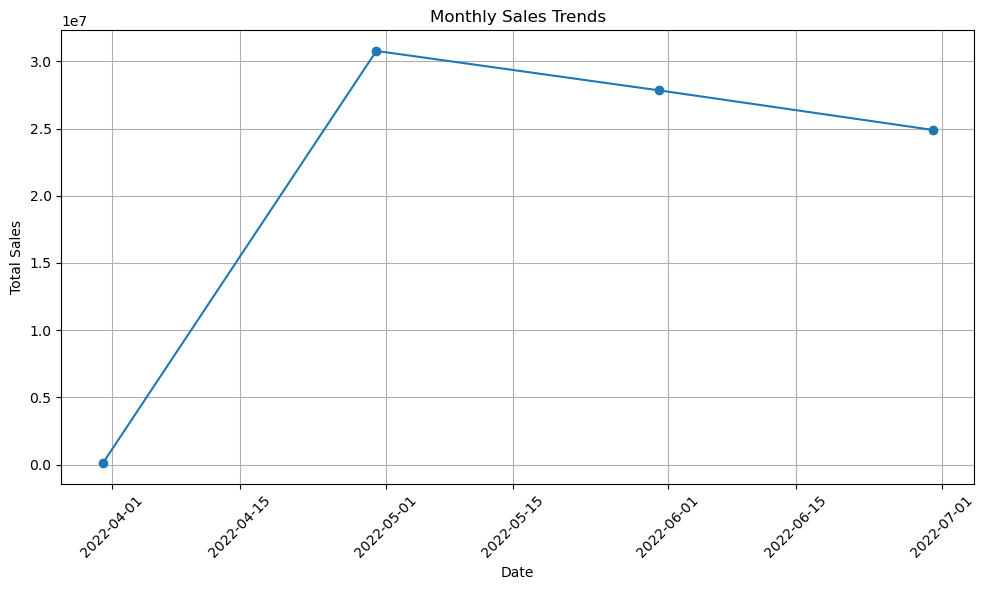

Total Units Sold: 116616
Number of Orders: 120201
Average Order Value: $649.75
Total Sales: $83628150.71
Growth Rate: 23059.44%


C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\1175832021.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  growth_rate = (monthly_sales[-1] - monthly_sales[0]) / monthly_sales[0] * 100  # Assuming simple growth rate


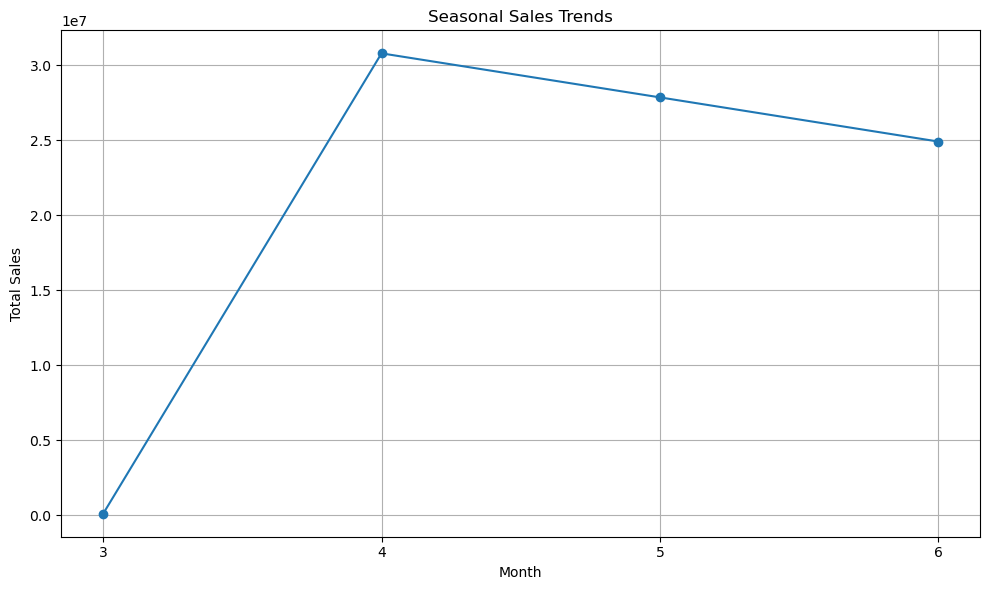

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate total sales by month
monthly_sales = df.resample('M', on='Date')['Amount'].sum()

# Calculate average order value
avg_order_value = df.groupby(df['Order ID'])['Amount'].mean().mean()

# Visualize monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example of calculating other KPIs
total_units_sold = df['Qty'].sum()
num_orders = df['Order ID'].nunique()
print(f"Total Units Sold: {total_units_sold}")
print(f"Number of Orders: {num_orders}")
print(f"Average Order Value: ${avg_order_value:.2f}")

# Calculate additional key metrics
total_sales = df['Amount'].sum()
growth_rate = (monthly_sales[-1] - monthly_sales[0]) / monthly_sales[0] * 100  # Assuming simple growth rate
seasonal_trends = df.groupby(df['Date'].dt.month)['Amount'].sum()

print(f"Total Sales: ${total_sales:.2f}")
print(f"Growth Rate: {growth_rate:.2f}%")

# Visualize seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends.index, seasonal_trends.values, marker='o', linestyle='-')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(seasonal_trends.index)
plt.tight_layout()
plt.show()


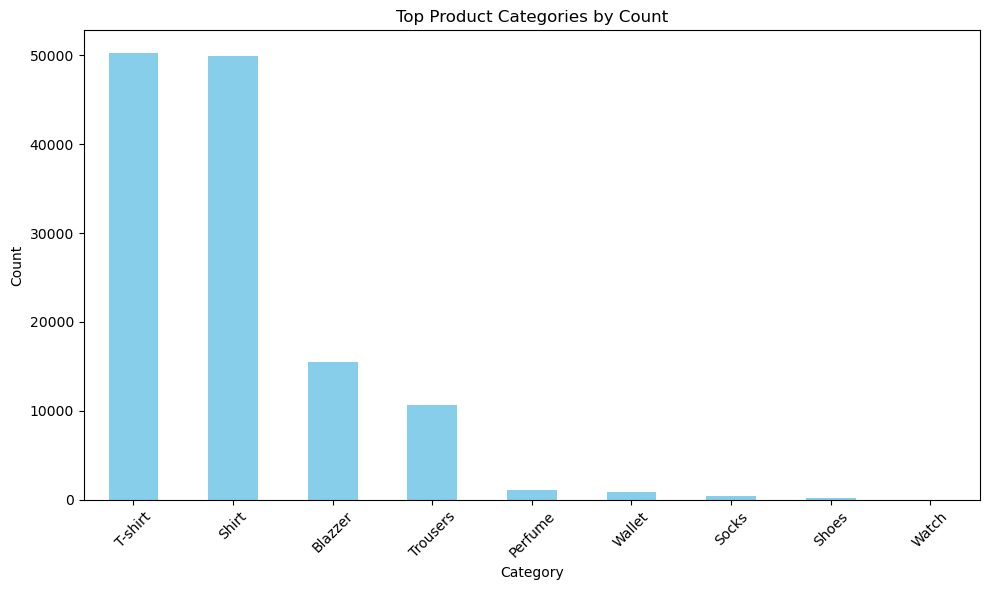

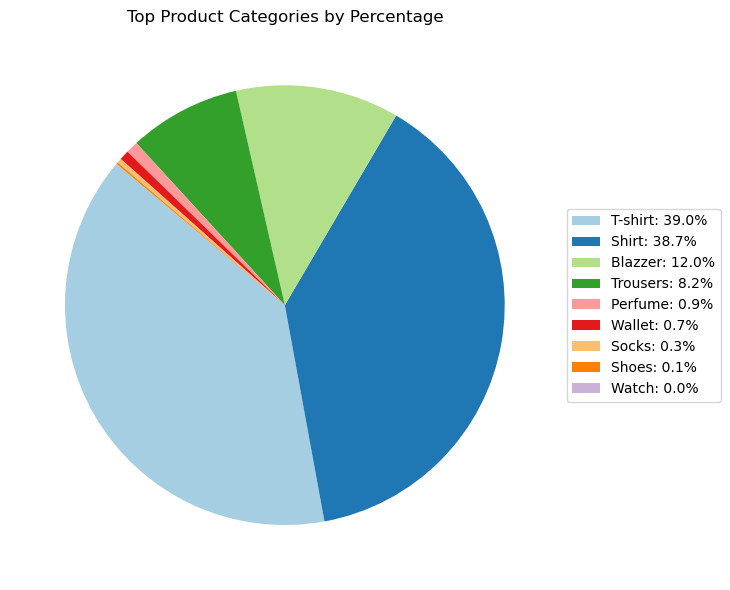

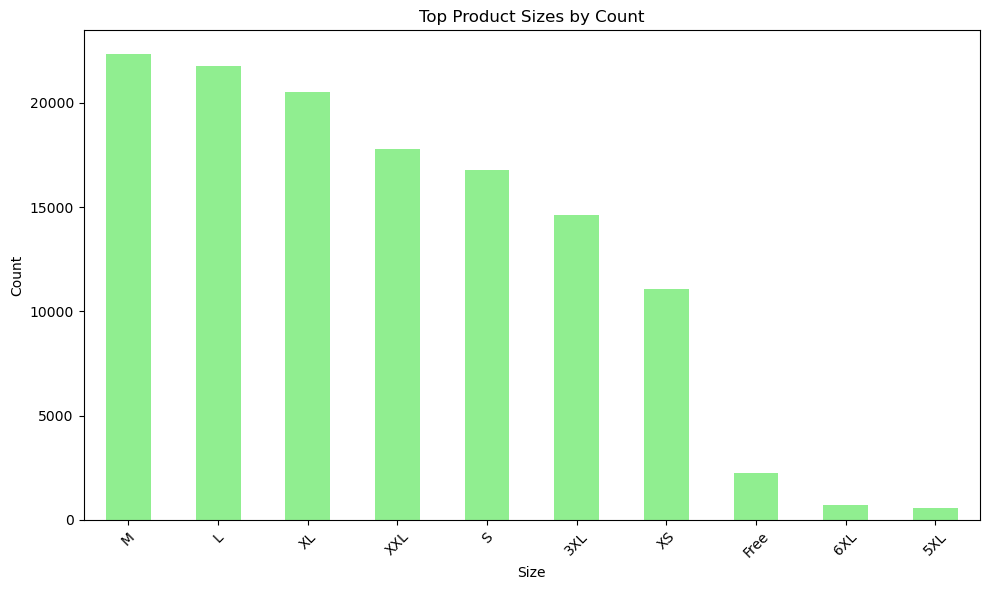

Top Products by Quantity Sold:
Category
T-shirt     45281
Shirt       45029
Blazzer     13942
Trousers     9895
Perfume      1051
Wallet        863
Socks         399
Shoes         153
Watch           3
Name: Qty, dtype: int64


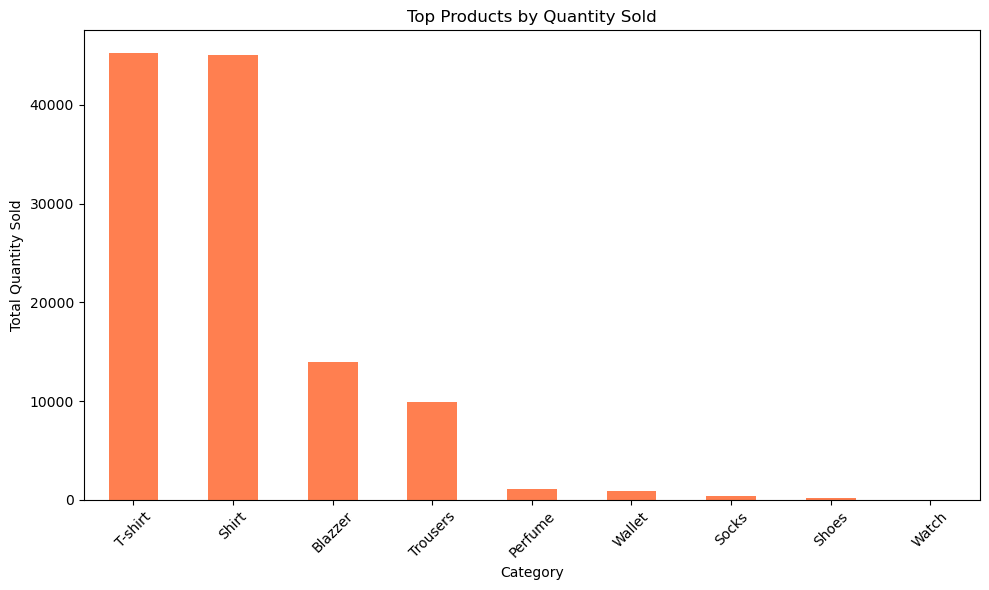

C:\Users\Asus\AppData\Local\Temp\ipykernel_15480\3725451709.py:79: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Qty'].sum()


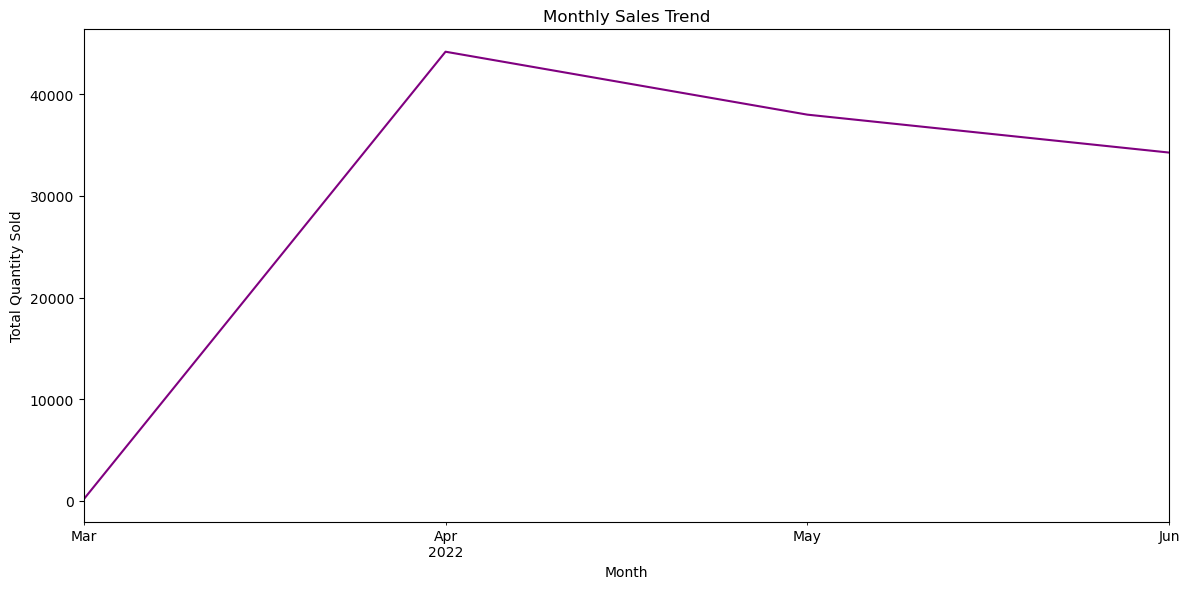

In [11]:
# Assuming df is your DataFrame containing the data

# Product Category Analysis
category_counts = df['Category'].value_counts()
top_categories = category_counts.head(10)  # Top 10 categories by count
category_percentage = (category_counts / category_counts.sum()) * 100

# Visualization: Product Category Distribution
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Product Category Analysis
category_counts = df['Category'].value_counts()
category_percentage = (category_counts / category_counts.sum()) * 100
top_category_percentage = category_percentage.head(10)

# Prepare labels with percentages for the legend
labels_with_percentages = [f'{category}: {percentage:.1f}%' for category, percentage in zip(top_category_percentage.index, top_category_percentage)]

# Visualization: Product Category Percentage
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(top_category_percentage)))
top_category_percentage.plot(kind='pie', labels=['']*len(top_category_percentage), colors=colors, startangle=140)

# Add a legend to the right side of the chart with percentages
plt.legend(labels=labels_with_percentages, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Top Product Categories by Percentage')
plt.ylabel('')
plt.tight_layout()
plt.show()


# Product Size Analysis
size_counts = df['Size'].value_counts()
top_sizes = size_counts.head(10)  # Top 10 sizes by count

# Visualization: Product Size Distribution
plt.figure(figsize=(10, 6))
top_sizes.plot(kind='bar', color='lightgreen')
plt.title('Top Product Sizes by Count')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Quantity Analysis
top_products_by_qty = df.groupby('Category')['Qty'].sum().nlargest(10)

# Print top products by quantity sold
print("Top Products by Quantity Sold:")
print(top_products_by_qty)

# Additional visualization: Top products by quantity sold
plt.figure(figsize=(10, 6))
top_products_by_qty.plot(kind='bar', color='coral')
plt.title('Top Products by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Assuming you have a column 'Date' in your DataFrame
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.set_index('Date').resample('M')['Qty'].sum()

# Visualization: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()








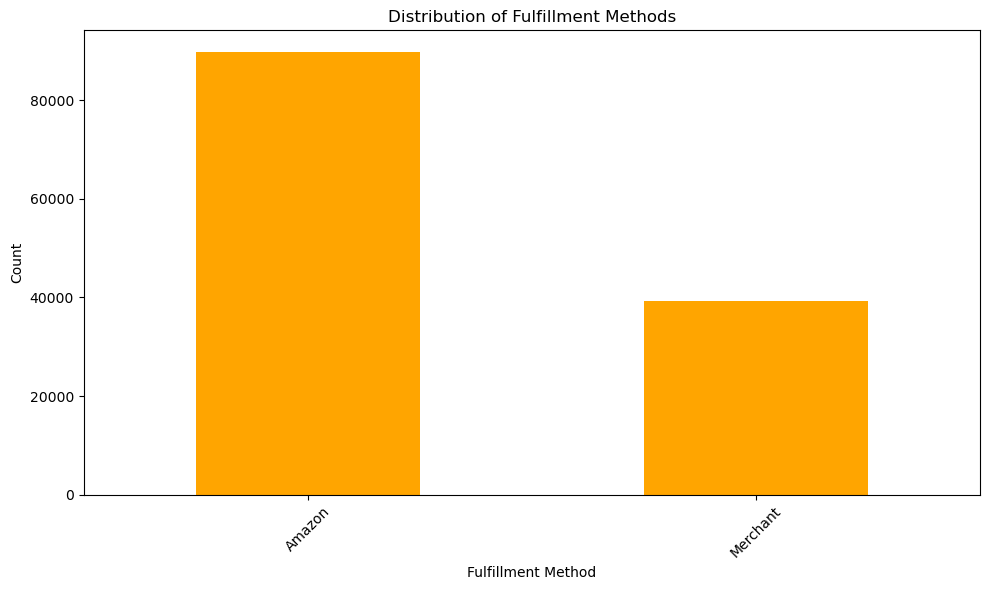

<Figure size 1200x600 with 0 Axes>

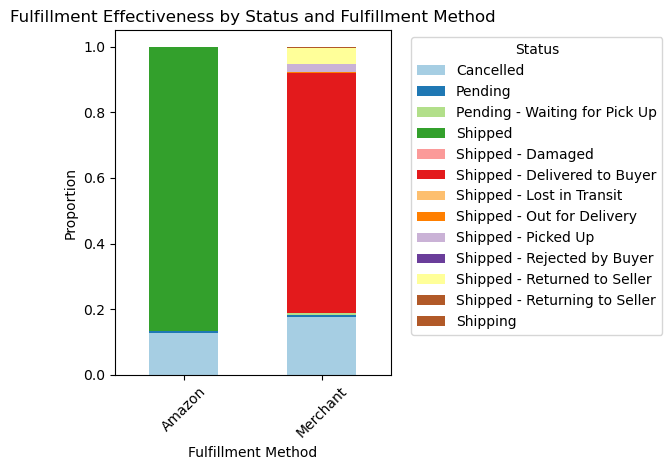

Fulfillment Effectiveness Metrics:
Status      Cancelled   Pending  Pending - Waiting for Pick Up   Shipped  \
Fulfilment                                                                 
Amazon       0.127895  0.004627                       0.000000  0.867389   
Merchant     0.174675  0.006191                       0.007159  0.000000   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon               0.000000                      0.000000   
Merchant             0.000025                      0.732459   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                       0.000000                    0.000000   
Merchant                     0.000127                    0.000892   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                                     
Am

In [12]:
# Fulfillment Methods Analysis
fulfillment_counts = df['Fulfilment'].value_counts()

# Effectiveness Analysis
# Assuming 'Status' contains different statuses and we want to analyze their distribution
status_counts_by_fulfillment = df.groupby('Fulfilment')['Status'].value_counts(normalize=True).unstack().fillna(0)

# Visualization: Fulfillment Methods Distribution
plt.figure(figsize=(10, 6))
fulfillment_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization: Fulfillment Effectiveness (status distribution by fulfillment method)
plt.figure(figsize=(12, 6))  # Adjusted figure size to allow space for the legend
status_counts_by_fulfillment.plot(kind='bar', stacked=True, color=plt.cm.Paired(range(len(status_counts_by_fulfillment.columns))))

# Set plot titles and labels
plt.title('Fulfillment Effectiveness by Status and Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Move the legend to the right side of the chart
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print fulfillment effectiveness metrics (optional)
print("Fulfillment Effectiveness Metrics:")
print(status_counts_by_fulfillment)

# Further analysis and visualizations can be added based on specific requirements

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


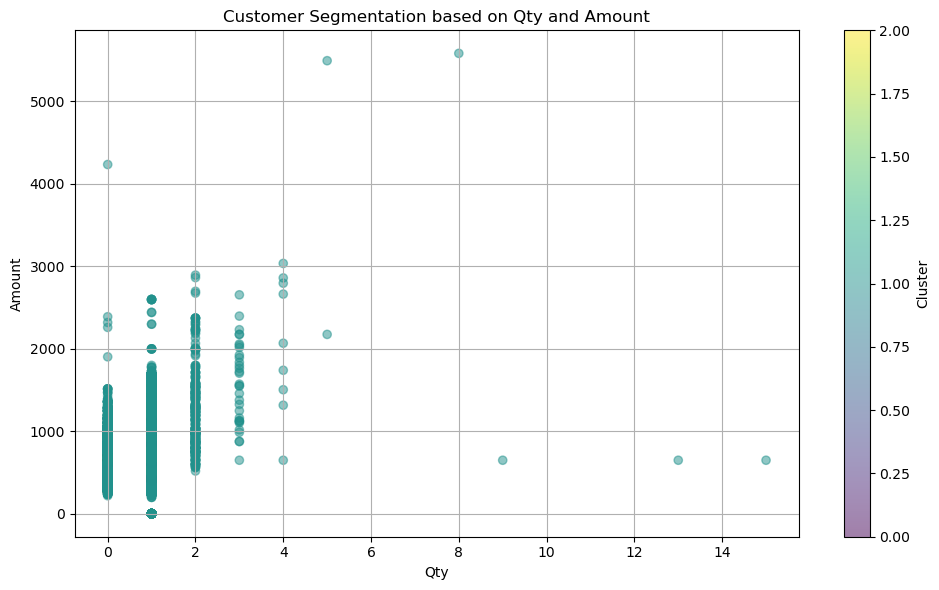

Cluster Counts:
Cluster
1    128881
2        43
0        17
Name: count, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Select relevant columns for segmentation
columns_for_segmentation = ['Qty', 'Amount', 'ship-city', 'ship-state']

# Prepare data for clustering
X = df[columns_for_segmentation]

# Handle categorical variables (city and state)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['ship-city', 'ship-state'])
    ],
    remainder='passthrough'
)

# Pipeline for preprocessing and clustering
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Use with_mean=False for sparse matrices
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Example: clustering into 3 segments
])

# Fit pipeline to data and predict clusters
pipeline.fit(X)
df['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Visualize clusters based on two numerical features (Qty and Amount)
plt.figure(figsize=(10, 6))
plt.scatter(df['Qty'], df['Amount'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation based on Qty and Amount')
plt.xlabel('Qty')
plt.ylabel('Amount')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Further analysis and interpretation of clusters
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Explore other dimensions and interpret customer segments based on business context


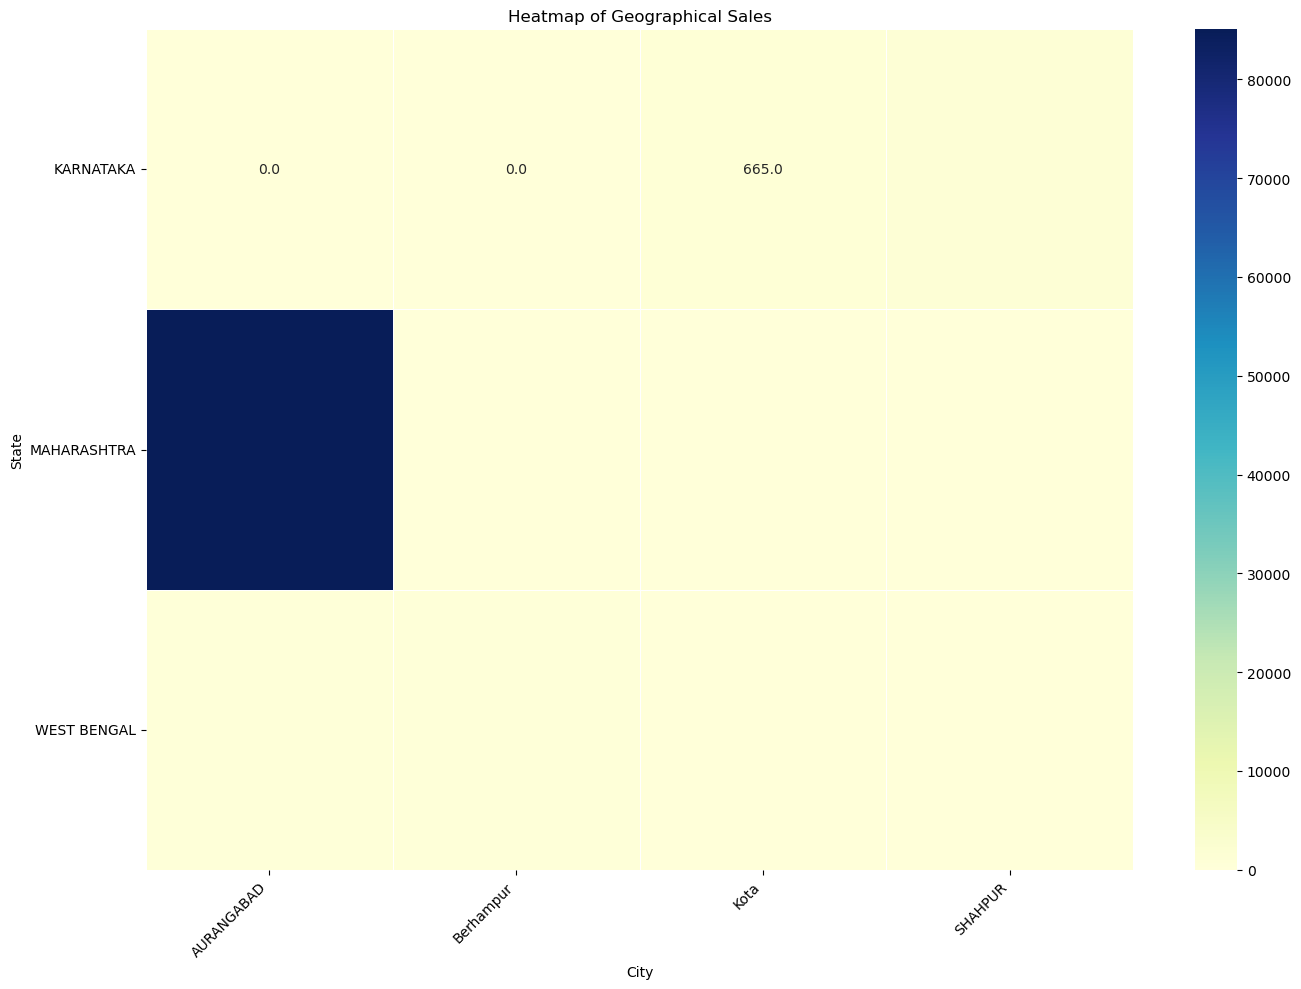

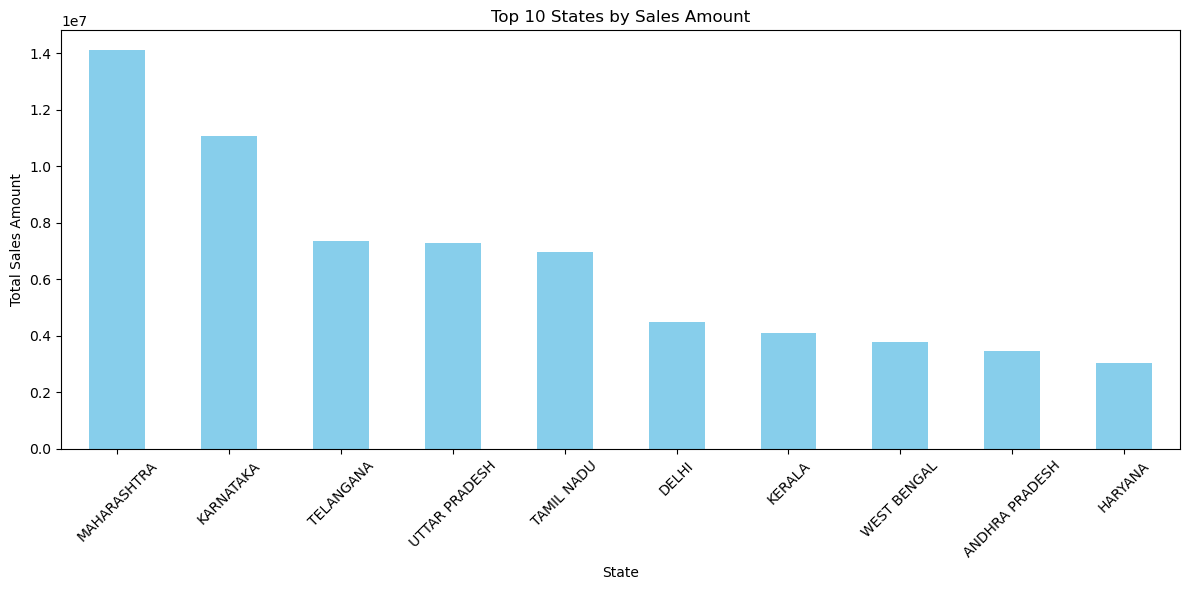

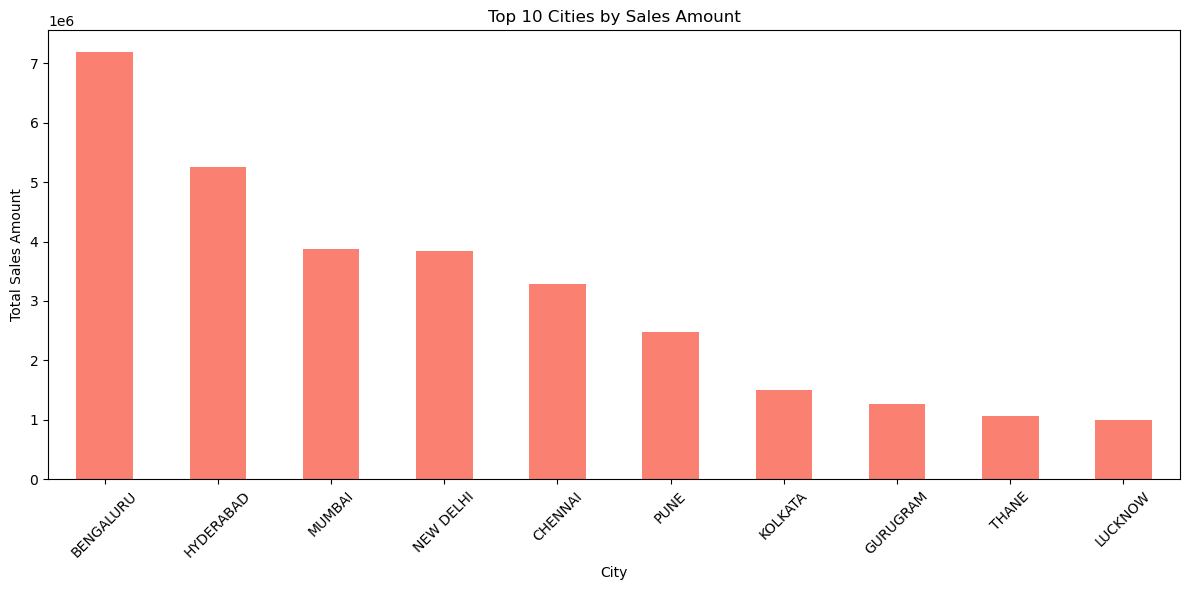

In [19]:
import seaborn as sns

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Grouping by state and city, aggregating sales metrics
state_city_sales = df.groupby(['ship-state', 'ship-city']).agg({
    'Qty': 'sum',
    'Amount': 'sum'
}).reset_index()

# Geographical Distribution Analysis - States
state_sales = state_city_sales.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Filter for top states and cities
top_states = state_city_sales['ship-state'].value_counts().index[:10]
top_cities = state_city_sales['ship-city'].value_counts().index[:10]

filtered_sales = state_city_sales[
    state_city_sales['ship-state'].isin(top_states) & 
    state_city_sales['ship-city'].isin(top_cities)
]

# Pivoting the data to create a matrix for the heatmap
heatmap_data = filtered_sales.pivot(index='ship-state', columns='ship-city', values='Amount')

# Fill missing values with 0 for better visualization
heatmap_data = heatmap_data.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1f")
plt.title('Heatmap of Geographical Sales')
plt.xlabel('City')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Plotting top states by sales amount
plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Geographical Distribution Analysis - Cities (top cities by sales)
top_cities_sales = state_city_sales.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Plotting top cities by sales amount
plt.figure(figsize=(12, 6))
top_cities_sales.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Sales Amount')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Sales Overview and Trends
Insight: The analysis revealed patterns in sales over time, highlighting peak sales periods and low seasons.

Recommendations:

Inventory Management: Increase stock levels during peak periods to meet demand and avoid stockouts. Reduce inventory during low seasons to minimize holding costs.
Marketing Campaigns: Plan and execute marketing campaigns ahead of peak seasons to capitalize on increased demand. Offer promotions or discounts during low seasons to stimulate sales.

2. Product Analysis
Insight: Certain product categories, sizes, and quantities are more popular among customers.

Recommendations:

Focus on Popular Products: Prioritize the promotion and availability of popular products to maximize sales.
Bundle Offers: Create bundle offers combining popular and less popular products to increase the overall sales volume.
Product Expansion: Consider expanding the range of high-demand product categories and sizes.

3. Fulfillment Analysis
Insight: Different fulfillment methods vary in their effectiveness in delivering orders.

Recommendations:

Optimize Fulfillment Processes: Streamline fulfillment processes to enhance delivery speed and reliability. Adopt best practices from the most effective fulfillment methods.
Partner with Reliable Couriers: Establish partnerships with reliable courier services to improve delivery performance.
Monitor Performance: Continuously monitor fulfillment performance metrics to identify and address issues promptly.

4. Customer Segmentation
Insight: Customers can be segmented based on their buying behavior, location, and other relevant factors.

Recommendations:

Targeted Marketing: Develop targeted marketing campaigns for different customer segments to increase engagement and conversion rates.
Personalized Offers: Offer personalized promotions and discounts to different customer segments based on their buying behavior.
Location-Based Strategies: Implement location-based strategies such as localized marketing campaigns and region-specific promotions.

5. Geographical Analysis
Insight: Sales distribution varies significantly across different states and cities.

Recommendations:

Regional Focus: Concentrate marketing efforts and resources on regions with high sales potential.
New Markets: Explore opportunities in underperforming regions by understanding local preferences and adapting offerings accordingly.
Logistics Optimization: Enhance logistics and distribution networks in high-demand regions to improve delivery times and customer satisfaction.

Customer Satisfaction and Service
Insight: Customer satisfaction is crucial for retaining customers and driving repeat purchases.

Recommendations:

Customer Feedback: Regularly collect and analyze customer feedback to identify pain points and areas for improvement.
Proactive Support: Provide proactive customer support to resolve issues quickly and effectively.
Enhance User Experience: Continuously improve the user experience across all customer touchpoints, from browsing to post-purchase support.

Data-Driven Decision Making
Insight: Data analytics provides valuable insights for informed decision-making.

Recommendations:

Invest in Analytics: Invest in advanced analytics tools and talent to gain deeper insights into customer behavior, sales trends, and operational efficiency.
Predictive Analytics: Use predictive analytics to forecast demand, identify emerging trends, and make proactive business decisions.
Performance Monitoring: Establish key performance indicators (KPIs) and dashboards to monitor business performance in real-time.

Employee Training and Development
Insight: Skilled and knowledgeable employees contribute to better customer service and operational efficiency.

Recommendations:

Ongoing Training: Provide ongoing training and development opportunities for employees to enhance their skills and knowledge.
Employee Empowerment: Empower employees with the tools and information they need to perform their roles effectively.
Feedback Loop: Create a feedback loop to capture insights and suggestions from employees to drive continuous improvement.

# Conclusion
By implementing these insights and recommendations, your business can optimize sales strategies, improve customer satisfaction, and enhance overall business performance. Regularly reviewing and adapting strategies based on data-driven insights will help maintain a competitive edge and achieve sustainable growth.